In [49]:
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np

In [50]:
with open('./rewards/rewards.pkl', 'rb') as f:
    rewards = pkl.load(f)

In [51]:
coef = np.polyfit(range(len(rewards)), rewards, 1)
poly1d_fn = np.poly1d(coef)
x = range(len(rewards))

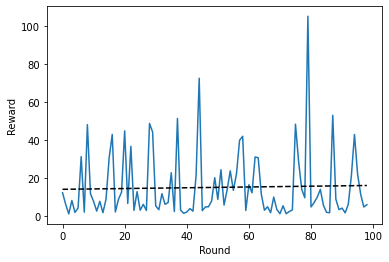

In [52]:
plt.plot(x,rewards, x, poly1d_fn(x), '--k')
#plt.plot(rewards)
plt.ylabel("Reward")
plt.xlabel("Round")
plt.show()

In [22]:
for i in range(5,8, 1):
    print(i)

5
6
7
